<a href="https://colab.research.google.com/github/mwithgod3952/jh_Minor_Projects/blob/main/tr_sales_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# !pip install fbprophet plotly
# !pip install pydove 

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pydove as dv

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode()

%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

import time
import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
df = pd.read_csv("/content/drive/MyDrive/6Th_class_Prophet_Classification_TimeGan/avocado.csv", index_col=False)
df.tail(3)

Unnamed: 0        Date  AveragePrice  ...     type  year            region
18246           9  2018-01-21          1.87  ...  organic  2018  WestTexNewMexico
18247          10  2018-01-14          1.93  ...  organic  2018  WestTexNewMexico
18248          11  2018-01-07          1.62  ...  organic  2018  WestTexNewMexico

[3 rows x 14 columns]

In [8]:
df = df.drop("Unnamed: 0", axis=1)
df.tail(3)

Date  AveragePrice  Total Volume  ...     type  year            region
18246  2018-01-21          1.87      13766.76  ...  organic  2018  WestTexNewMexico
18247  2018-01-14          1.93      16205.22  ...  organic  2018  WestTexNewMexico
18248  2018-01-07          1.62      17489.58  ...  organic  2018  WestTexNewMexico

[3 rows x 13 columns]

In [9]:
df_Date =   df['Date'].unique()
df_type =   df['type'].unique()
df_region = df['region'].unique()
print("Date_shape", df_Date.shape, " / ", "type_shape", df_type.shape, " / ", "region_shape", df_region.shape)

Date_shape (169,)  /  type_shape (2,)  /  region_shape (54,)


In [10]:
df_as_ts = df.copy()
df_as_ts['Date'] = pd.to_datetime(df_as_ts['Date'])
type(df_as_ts['Date'])

pandas.core.series.Series

In [11]:
df_as_ts.index = df_as_ts['Date']

In [12]:
print("numbers of factor about region : ", df_as_ts["region"].unique().shape)
print("=" * 39)
print("factors of region : ")
for x in range(len(df_as_ts["region"].unique())):
    print(df_as_ts["region"].unique()[x])

numbers of factor about region :  (54,)
factors of region : 
Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston
Indianapolis
Jacksonville
LasVegas
LosAngeles
Louisville
MiamiFtLauderdale
Midsouth
Nashville
NewOrleansMobile
NewYork
Northeast
NorthernNewEngland
Orlando
Philadelphia
PhoenixTucson
Pittsburgh
Plains
Portland
RaleighGreensboro
RichmondNorfolk
Roanoke
Sacramento
SanDiego
SanFrancisco
Seattle
SouthCarolina
SouthCentral
Southeast
Spokane
StLouis
Syracuse
Tampa
TotalUS
West
WestTexNewMexico


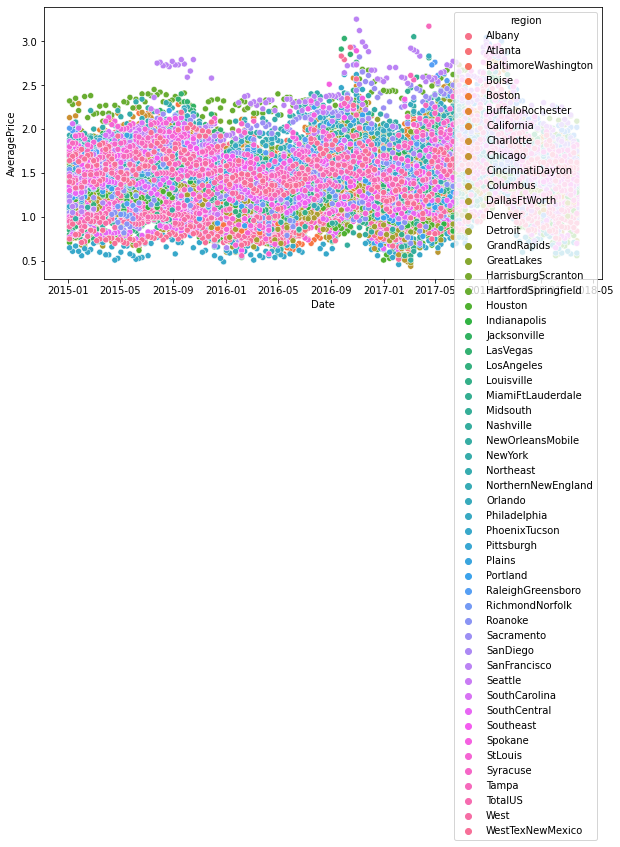

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(df_as_ts.index, df_as_ts['AveragePrice'], data=df_as_ts, hue="region")
plt.show()

In [16]:
lst = []
for i in range(len(df_as_ts["region"].unique())):
    lst.append(df_as_ts.iloc[np.where(df_as_ts["region"] == df_as_ts["region"].unique()[i])])
np.shape(lst)   

(54,)

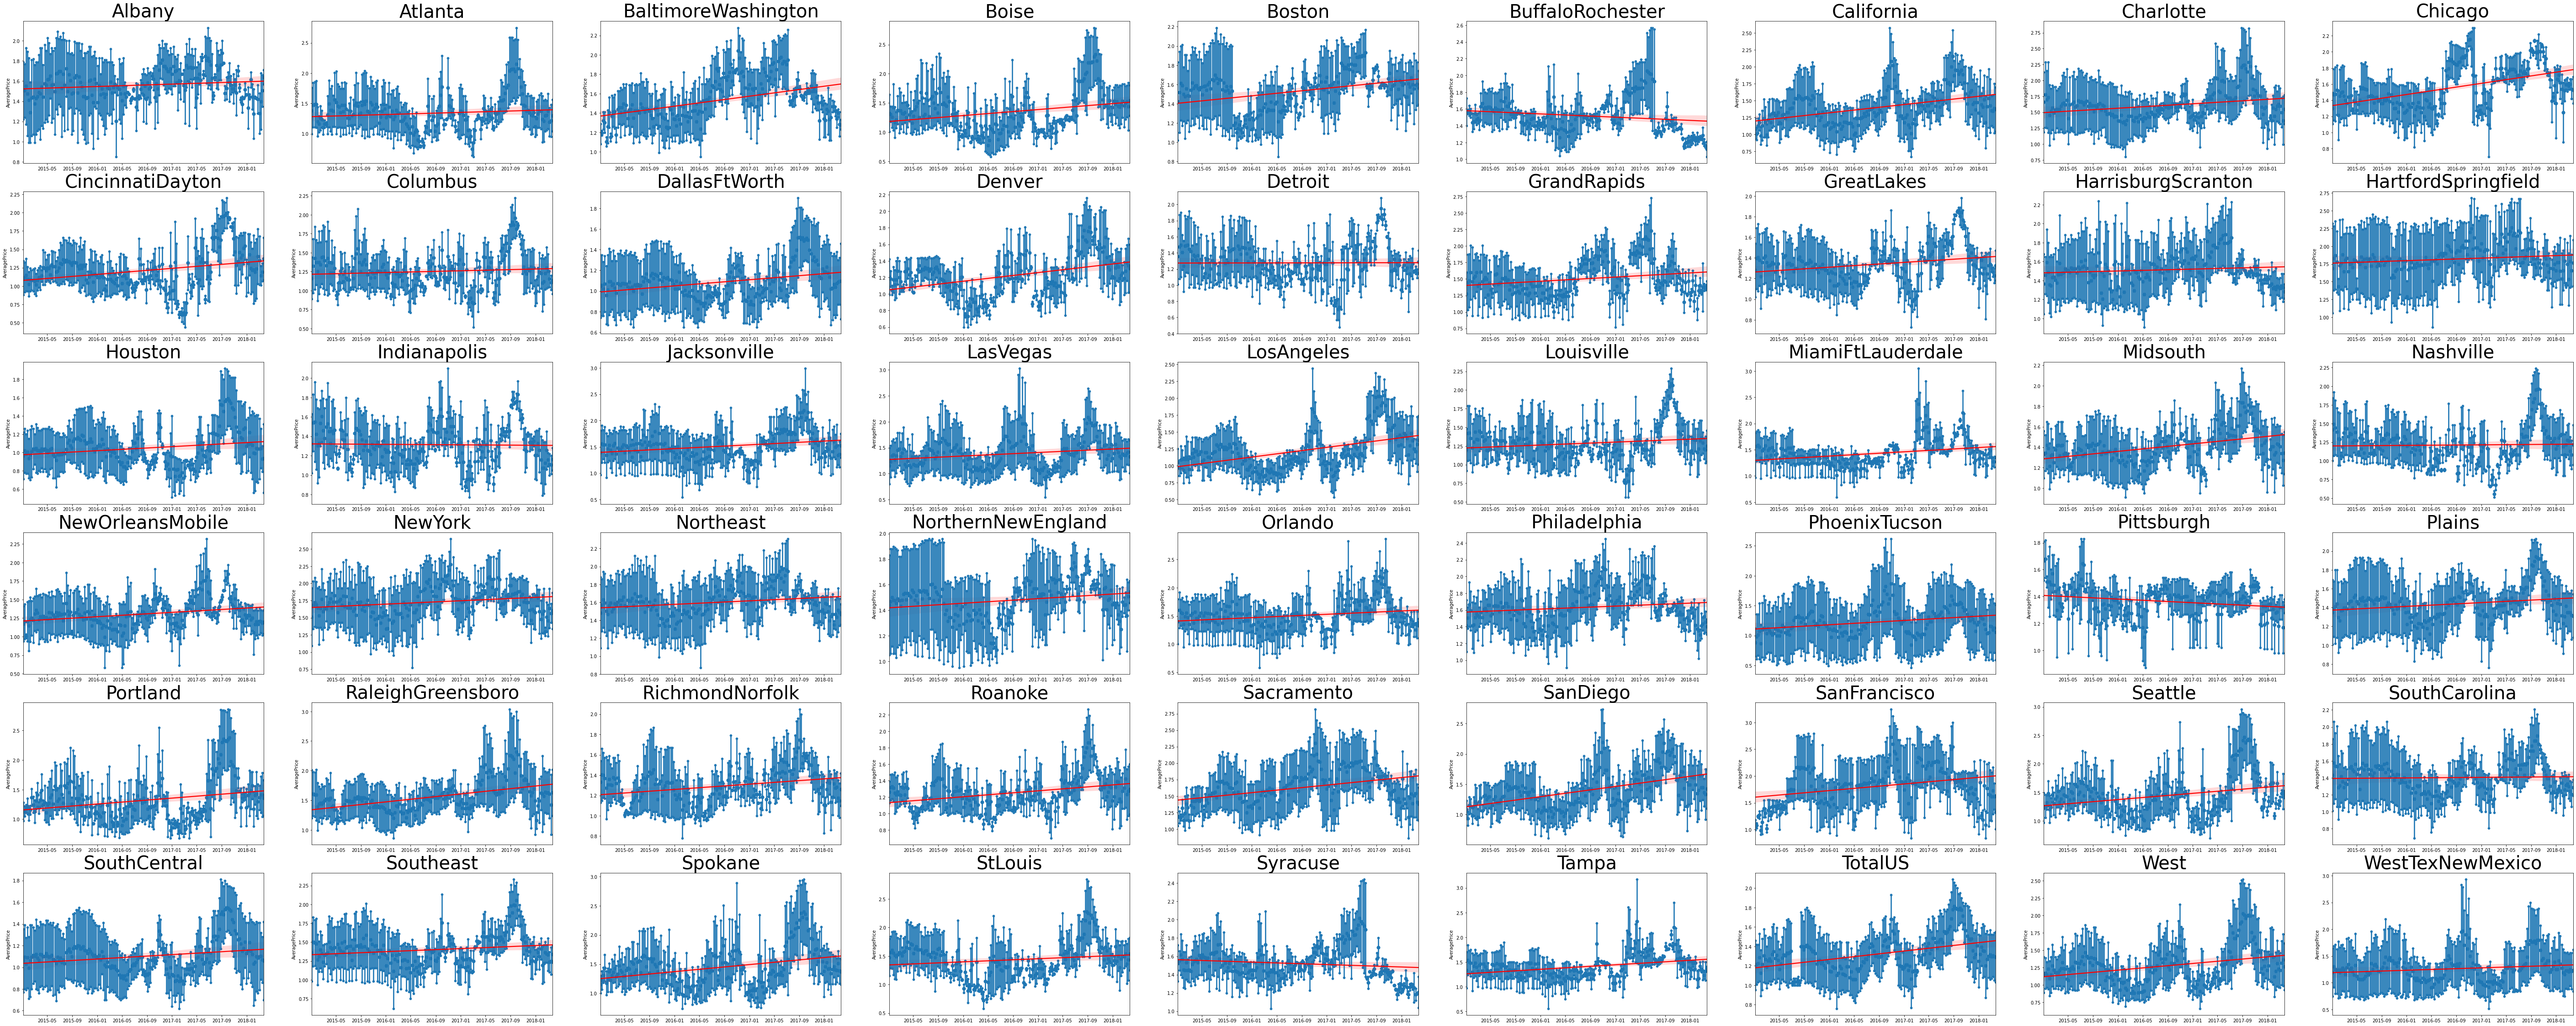

In [17]:
plt.figure(figsize=(100, 40))
res_lst = []
tle_lst = []
n = 0
for x in lst:

   ax = plt.subplot(6, 9, n+1) 

   X = np.array(x.index.to_pydatetime(), dtype=np.datetime64) 
   Y = x["AveragePrice"]

   ax.xaxis.update_units(X)
   sns.scatterplot(X, Y)
   sns.regplot(x=ax.xaxis.convert_units(X), y=Y, data=x, x_estimator=np.mean, logx=True, line_kws={"color": "red"})

   res = sm.OLS(Y, ax.xaxis.convert_units(X)).fit()
   res_lst.append(res)

   ax.set_title(x.region.unique()[0], fontsize=40)
   tle_lst.append((x.region.unique()[0]))

   n = n+1 

***regplot 결과값 분해***

In [18]:
parameters = []
for xth in range(len(res_lst)):
    parameters.append(res_lst[xth].params[0])
    print(f'{xth}TP, ', end="")
    time.sleep(0.1)

0TP, 1TP, 2TP, 3TP, 4TP, 5TP, 6TP, 7TP, 8TP, 9TP, 10TP, 11TP, 12TP, 13TP, 14TP, 15TP, 16TP, 17TP, 18TP, 19TP, 20TP, 21TP, 22TP, 23TP, 24TP, 25TP, 26TP, 27TP, 28TP, 29TP, 30TP, 31TP, 32TP, 33TP, 34TP, 35TP, 36TP, 37TP, 38TP, 39TP, 40TP, 41TP, 42TP, 43TP, 44TP, 45TP, 46TP, 47TP, 48TP, 49TP, 50TP, 51TP, 52TP, 53TP, 

In [19]:
par_df = pd.DataFrame()
par_df["parameters"] = parameters
par_df["region"] = tle_lst

pd.options.display.float_format = '{:.10f}'.format
print(par_df.tail(1))

     parameters            region
53 0.0000017139  WestTexNewMexico


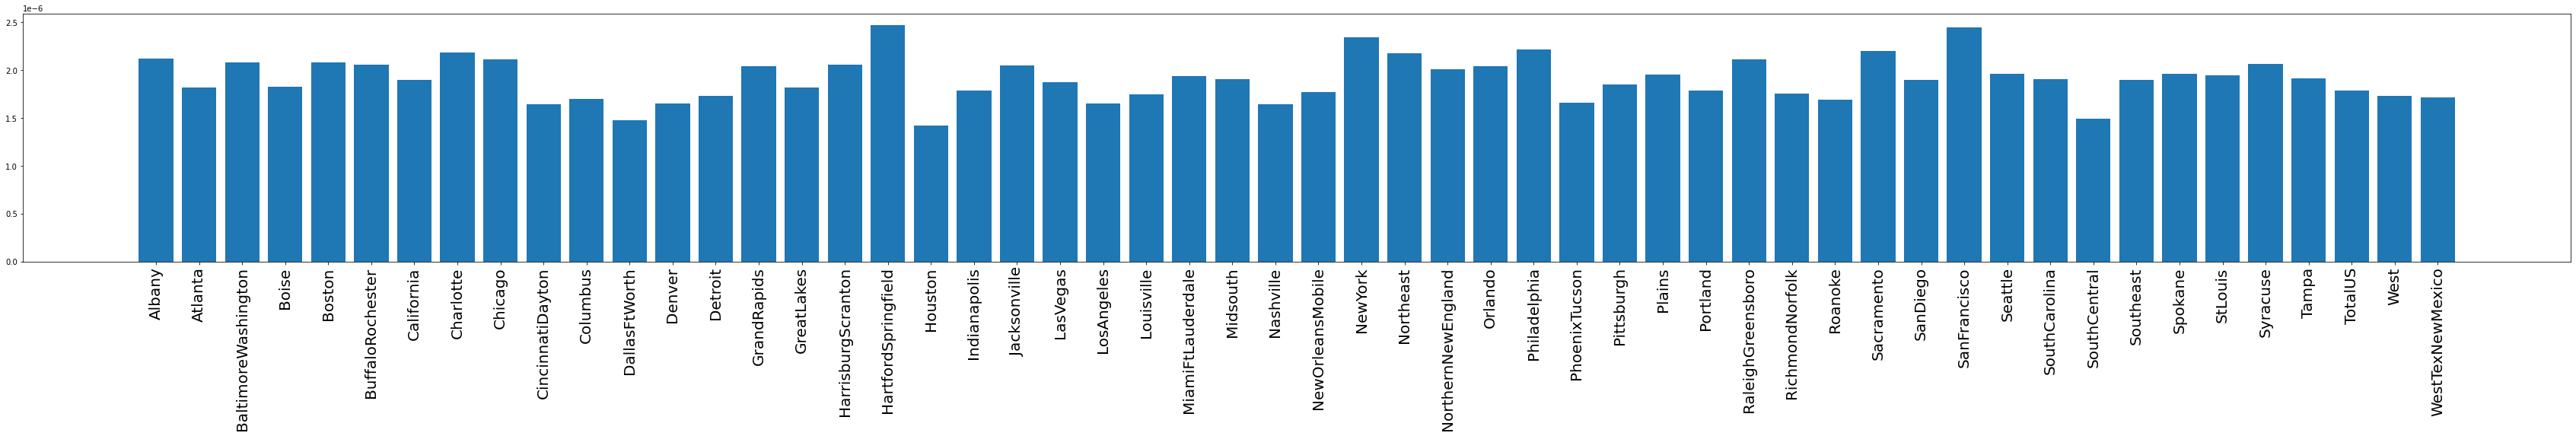

In [20]:
def vis_df(df):
    plt.figure(figsize=(60,6))

    x = np.arange(len(df))
    plt.bar(x, df['parameters'])
    plt.xticks(x, df['region'], fontsize=20, rotation=90)
    return plt.show()

vis_df(par_df)

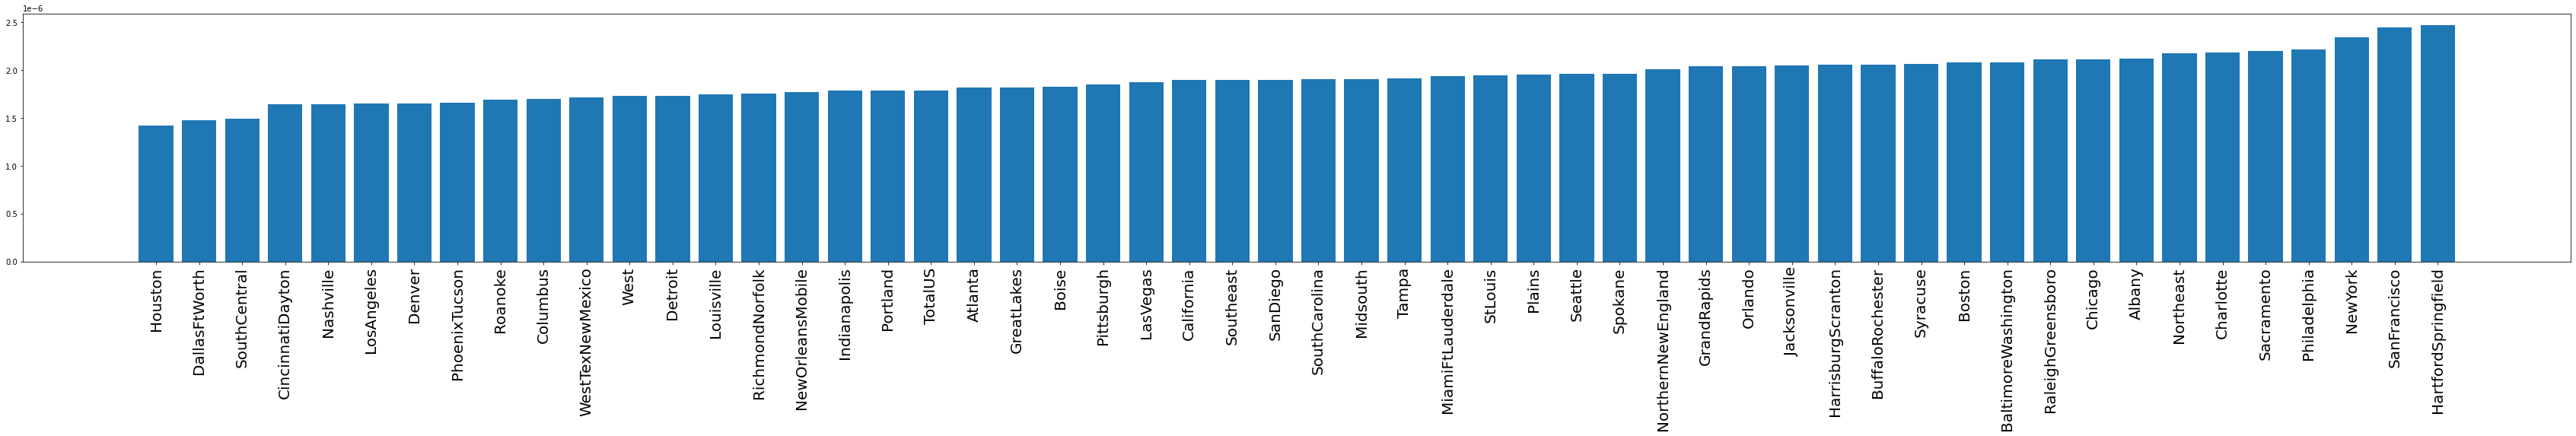

In [21]:
par_df_sorted = par_df.sort_values(by=['parameters'])
vis_df(par_df_sorted)

---

In [22]:
le = LabelEncoder()
df.iloc[:,10] = le.fit_transform(df.iloc[:,10])
print(df.tail(2))

             Date  AveragePrice     Total Volume  ...  type  year            region
18247  2018-01-14  1.9300000000 16205.2200000000  ...     1  2018  WestTexNewMexico
18248  2018-01-07  1.6200000000 17489.5800000000  ...     1  2018  WestTexNewMexico

[2 rows x 13 columns]


In [23]:
X = df[['Date','Total Volume', '4046', '4225', '4770', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type']]
# y = Average price
y = df.iloc[:,1]  

print(X.tail(2))
print(y.tail(2))

             Date     Total Volume  ...  XLarge Bags  type
18247  2018-01-14 16205.2200000000  ... 0.0000000000     1
18248  2018-01-07 17489.5800000000  ... 0.0000000000     1

[2 rows x 9 columns]
18247   1.9300000000
18248   1.6200000000
Name: AveragePrice, dtype: float64


In [24]:
train_dataset = pd.DataFrame()
'''
ds : timestamp
'''
train_dataset['ds'] = pd.to_datetime(X["Date"])
train_dataset['y'] = y

print(train_dataset.tail(2))

              ds            y
18247 2018-01-14 1.9300000000
18248 2018-01-07 1.6200000000


In [25]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future = prophet_basic.make_future_dataframe(periods=300)
forecast = prophet_basic.predict(future)

In [27]:
forecast.tail(3)

ds        trend  ...  multiplicative_terms_upper         yhat
466 2019-01-17 1.2055905165  ...                0.0000000000 1.0981182309
467 2019-01-18 1.2048479777  ...                0.0000000000 1.0963222132
468 2019-01-19 1.2041054390  ...                0.0000000000 1.0940934380

[3 rows x 16 columns]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


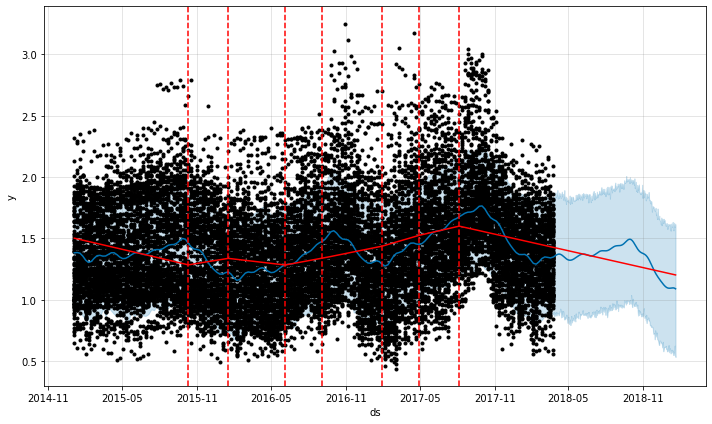

In [28]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [29]:
years = [2015, 2016, 2017]
for yr in years:
    print([X.strftime("%Y-%m-%d") for X in prophet_basic.changepoints if X.year == yr])

['2015-02-08', '2015-03-15', '2015-04-26', '2015-05-31', '2015-07-12', '2015-08-16', '2015-09-20', '2015-11-01', '2015-12-06']
['2016-01-17', '2016-02-21', '2016-03-27', '2016-05-08', '2016-06-12', '2016-07-24', '2016-08-28', '2016-10-02', '2016-11-13', '2016-12-18']
['2017-01-29', '2017-03-05', '2017-04-09', '2017-05-21', '2017-06-25', '2017-08-06']


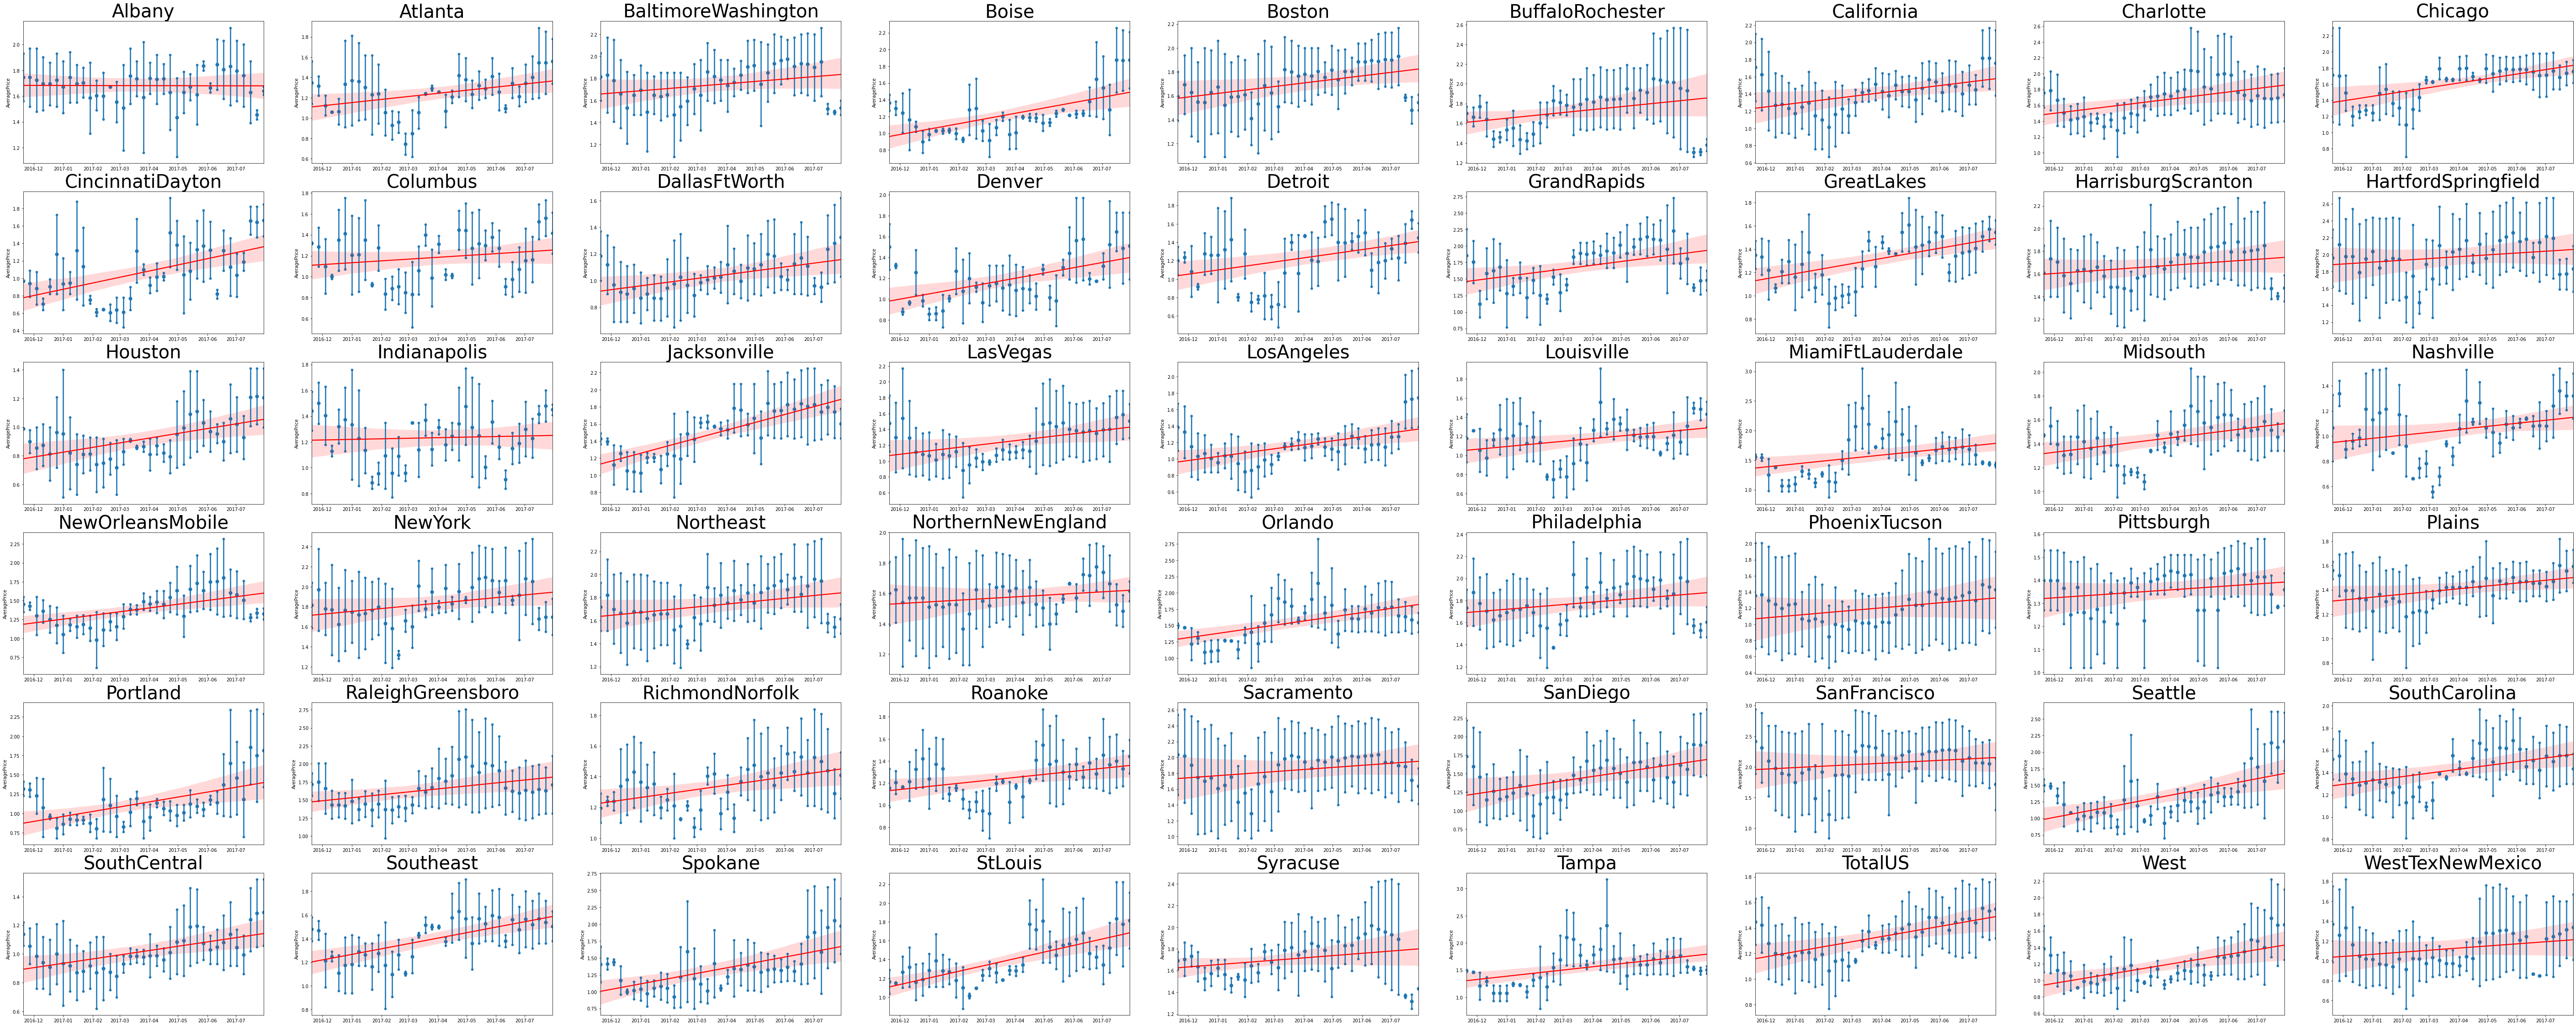

In [54]:
plt.figure(figsize=(100, 40))
res_lst = []
tle_lst = []
n = 0
for x in lst:

   ax = plt.subplot(6, 9, n+1) 
   # [2016-11-13] ~ [2017-08-06] : Arima모델을 통한 추이 예측값에 근거하여 안정적으로 전 지구에서 전반적으로 Avg price가 상승한 패턴은 해당 기간에 두드러진것으로 유추된다. 
   ps_array = np.where((x.index > "2016-11-13") & (x.index < "2017-08-06"))
   x = x.iloc[ps_array]

   X = np.array(x.index.to_pydatetime(), dtype=np.datetime64) 
   Y = x["AveragePrice"]

   ax.xaxis.update_units(X)
   sns.scatterplot(X, Y)
   sns.regplot(x=ax.xaxis.convert_units(X), y=Y, data=x, x_estimator=np.mean, logx=True, line_kws={"color": "red"})

   res = sm.OLS(Y, ax.xaxis.convert_units(X)).fit()
   res_lst.append(res)

   ax.set_title(x.region.unique()[0], fontsize=40)
   tle_lst.append((x.region.unique()[0]))

   n = n+1 